In [26]:
import random
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Data Collection

In [27]:
random.seed(42)
customer_ids = []
ages = []
genders = []
marital_statuses = []
annual_incomes = []
total_purchases = []
preferred_categories = []

In [28]:
for customer_id in range(1001, 1501):
    customer_ids.append(customer_id)
    ages.append(random.randint(18, 65))
    genders.append(random.choice(['Male', 'Female']))
    marital_statuses.append(random.choice(['Married', 'Single', 'Divorced']))
    annual_incomes.append(random.randint(25000, 90000))
    total_purchases.append(random.randint(18, 90))
    preferred_categories.append(random.choice(['Electronics', 'Appliances']))

In [29]:
data = {
    'CustomerID': customer_ids,
    'Age': ages,
    'Gender': genders,
    'MaritalStatus': marital_statuses,
    'AnnualIncome (USD)': annual_incomes,
    'TotalPurchases': total_purchases,
    'PreferredCategory': preferred_categories
}

In [30]:
df = pd.DataFrame(data)
df.to_csv('data.csv', index=False)

### Data Preprocessing

In [31]:
df.head(7)

,CustomerID,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
0,1001,58,Male,Married,73598,53,Electronics
1,1002,32,Male,Divorced,31717,87,Electronics
2,1003,55,Female,Married,26952,29,Electronics
3,1004,32,Male,Divorced,38031,87,Appliances
4,1005,32,Female,Divorced,43231,18,Electronics
5,1006,62,Female,Single,43210,37,Electronics
6,1007,39,Male,Married,49898,30,Appliances


In [32]:
df.describe()

,CustomerID,Age,AnnualIncome (USD),TotalPurchases
count,500.000000,500.0000,500.000000,500.000000
mean,1250.500000,41.3220,58277.282000,55.058000
std,144.481833,13.4932,19297.760423,21.344832
min,1001.000000,18.0000,25506.000000,18.000000
25%,1125.750000,29.0000,41379.750000,36.000000
50%,1250.500000,42.0000,58917.500000,56.000000
75%,1375.250000,53.0000,75015.000000,74.000000
max,1500.000000,65.0000,89990.000000,90.000000


In [33]:
num_cols = ['Age', 'AnnualIncome (USD)', 'TotalPurchases']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [34]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['PreferredCategory'] = label_encoder.fit_transform(df['PreferredCategory'])

In [35]:
df.head(10)

,CustomerID,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
0,1001,1.237268,1,1,0.794707,-0.096513,1
1,1002,-0.691558,1,0,-1.377719,1.497973,1
2,1003,1.014711,0,1,-1.624886,-1.222033,1
3,1004,-0.691558,1,0,-1.050203,1.497973,0
4,1005,-0.691558,0,0,-0.780471,-1.737897,1
5,1006,1.534010,0,2,-0.781561,-0.846860,1
6,1007,-0.172259,1,1,-0.434645,-1.175137,0
7,1008,-0.098073,0,1,0.754506,0.982110,1
8,1009,0.050298,1,0,-0.729534,0.419350,1
9,1010,1.608196,1,1,0.521760,-0.377893,0


### Exploratory Data Analysis

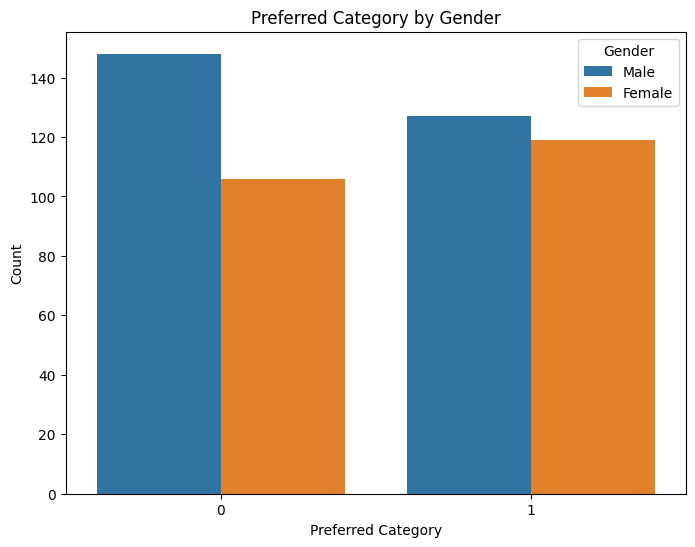

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PreferredCategory', hue='Gender')
plt.title('Preferred Category by Gender')
plt.xlabel('Preferred Category')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
plt.show()

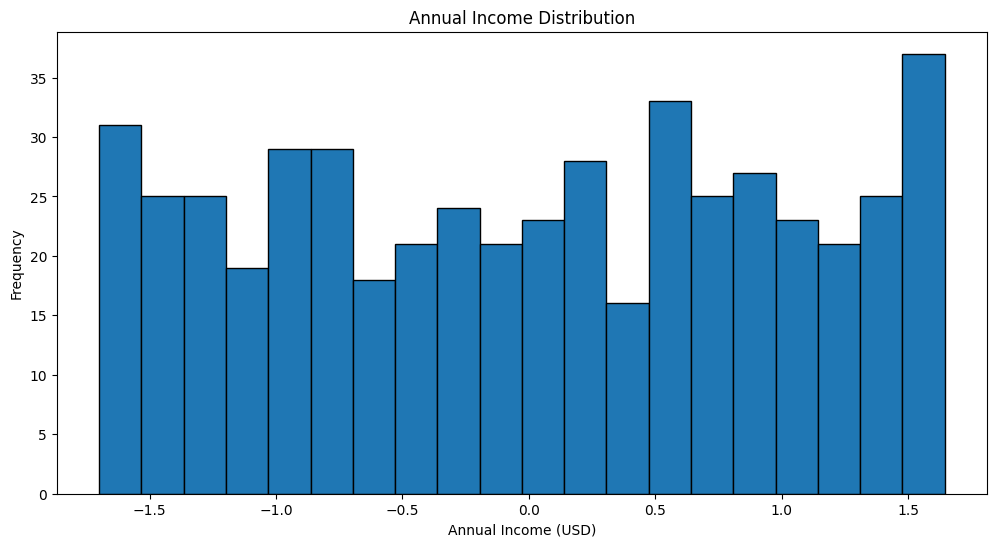

In [37]:
plt.figure(figsize=(12, 6))
plt.hist(df['AnnualIncome (USD)'], bins=20, edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Frequency')
plt.show()

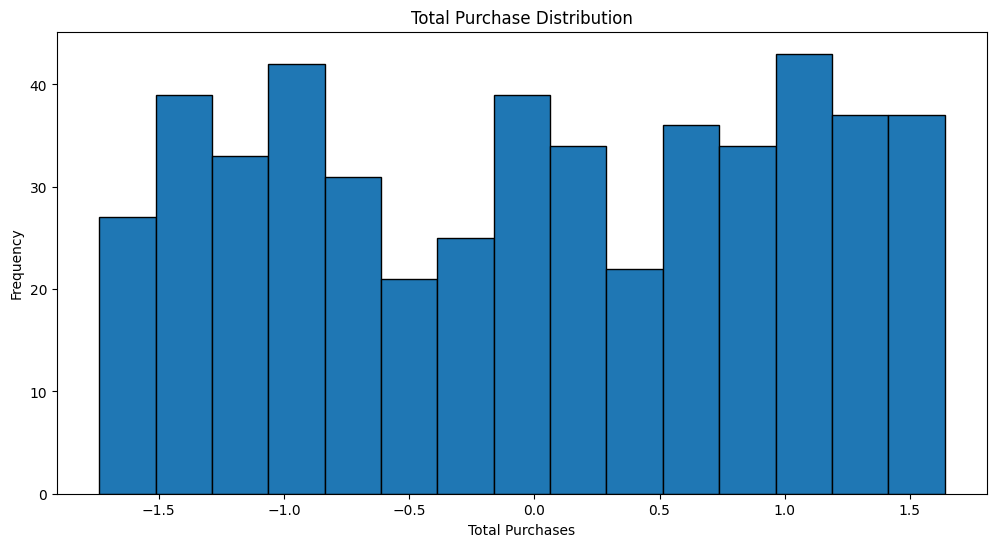

In [38]:
plt.figure(figsize=(12, 6))
plt.hist(df['TotalPurchases'], bins=15, edgecolor='black')
plt.title('Total Purchase Distribution')
plt.xlabel('Total Purchases')
plt.ylabel('Frequency')
plt.show()

### Customer Segmentation

In [39]:
features = ['Age', 'AnnualIncome (USD)', 'TotalPurchases']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

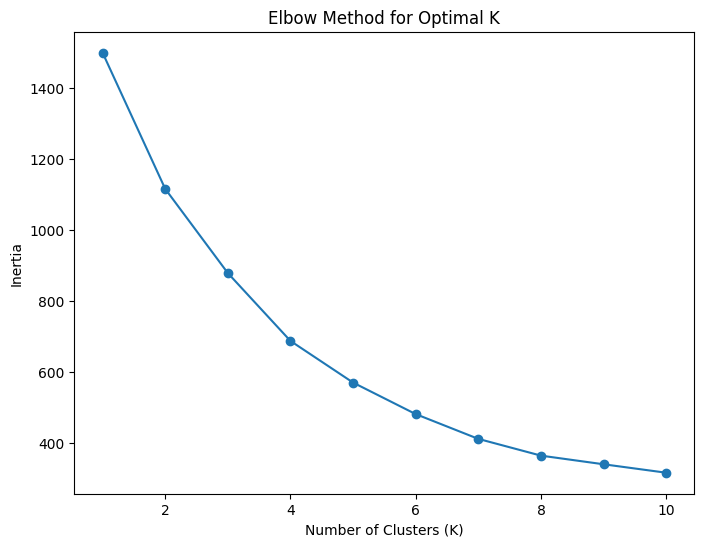

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

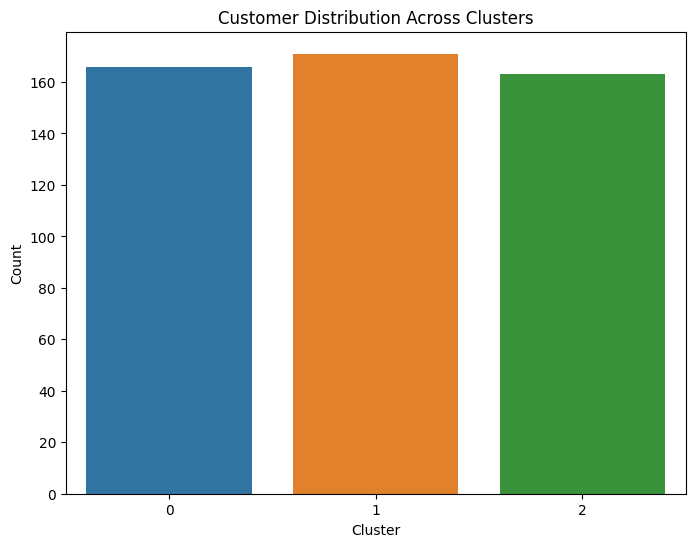

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cluster')
plt.title('Customer Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()